## Federal University of Bahia (UFBA)

### Department of Electrical and Computer Engineering

### Course: PPGEE0023 - Attribute Extraction

### Professor: Eduardo Simas

### Students: Gabriel Correia and Márcio Barros

---



## - Multivariate Analysis and Signal Separation: Application of PCA and ICA with Real and Synthetic Data (Iris Flower):

1. Import a multivariate dataset of your choice

2. Compute the autocorrelation matrix and plot it as a heatmap

3. Plot scatter plots for the variables in the chosen dataset

4. Perform PCA on the chosen dataset

5. Plot the variance curve of the principal components

6. Compute the autocorrelation matrix in the transformed domain and plot it as a heatmap

7. Determine the number N of components required to retain 90 percent of the total variance of the data

8. Project the dataset onto the transformed domain of the principal components using only the first components and then return to the original domain Compare the original and reconstructed variables using the first components

9. Create the following source signals with 3000 samples over a time base from 0 to 10 seconds:
- Sine wave 1: s1 = sin(3t) + 1
- Sine wave 2: s2 = sin(2t) - 1
- Sawtooth wave: s3 = sawtooth(5t)


10. Add Gaussian noise with zero mean and a standard deviation of 0.1 to all 3 signals, create a mixing matrix, and generate three mixed signals x1(t), x2(t) and x3(t)

11. Perform ICA on the mixed signals and plot the noisy source signals, the mixed signals, and the signals recovered by ICA Was it possible to recover the original sources satisfactorily

12. Repeat the steps for computing the autocorrelation matrix and scatter plots by modifying the mixing matrix and increasing the noise standard deviation to 0.5 Comment on the results obtained


---



## Importing the Libraries:

---

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, FastICA
from scipy.signal import sawtooth

## Function to Calculate and Plot the Autocorrelation Matrix:
---



In [17]:
# Function to calculate and plot the correlation matrix
def plot_correlation_matrix(data, title="Correlation Matrix"):
    correlation_matrix = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(title)
    plt.show()

## Plotting Scatter Plots for the Variables in the Dataset:
---

In [18]:
# Function for scatter plots
def scatter_plots(data):
    pd.plotting.scatter_matrix(data, figsize=(12, 12), diagonal='kde')
    plt.show()

## Main Code - Importing the Database, Plotting Autocorrelation Matrix, Scatter Plots, Running PCA, and the Variance Curve:
---

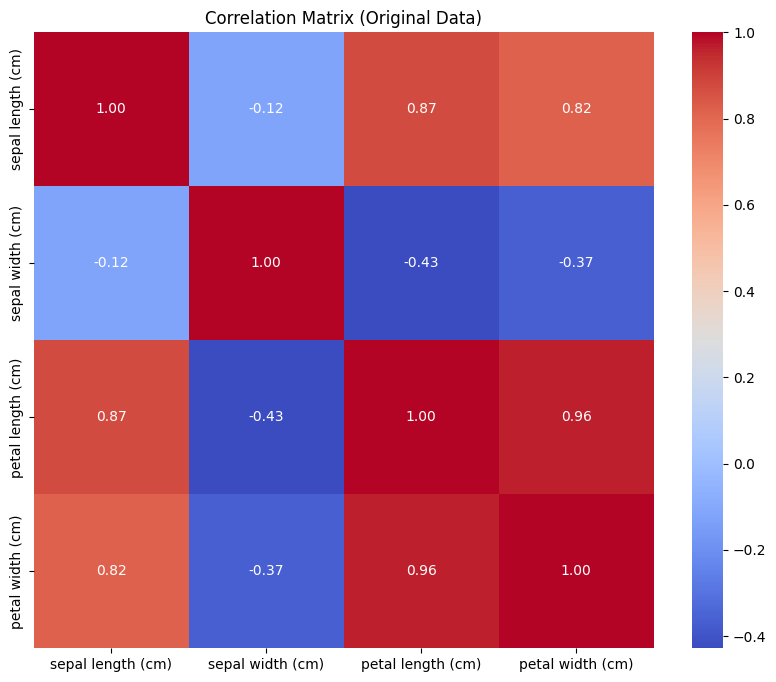

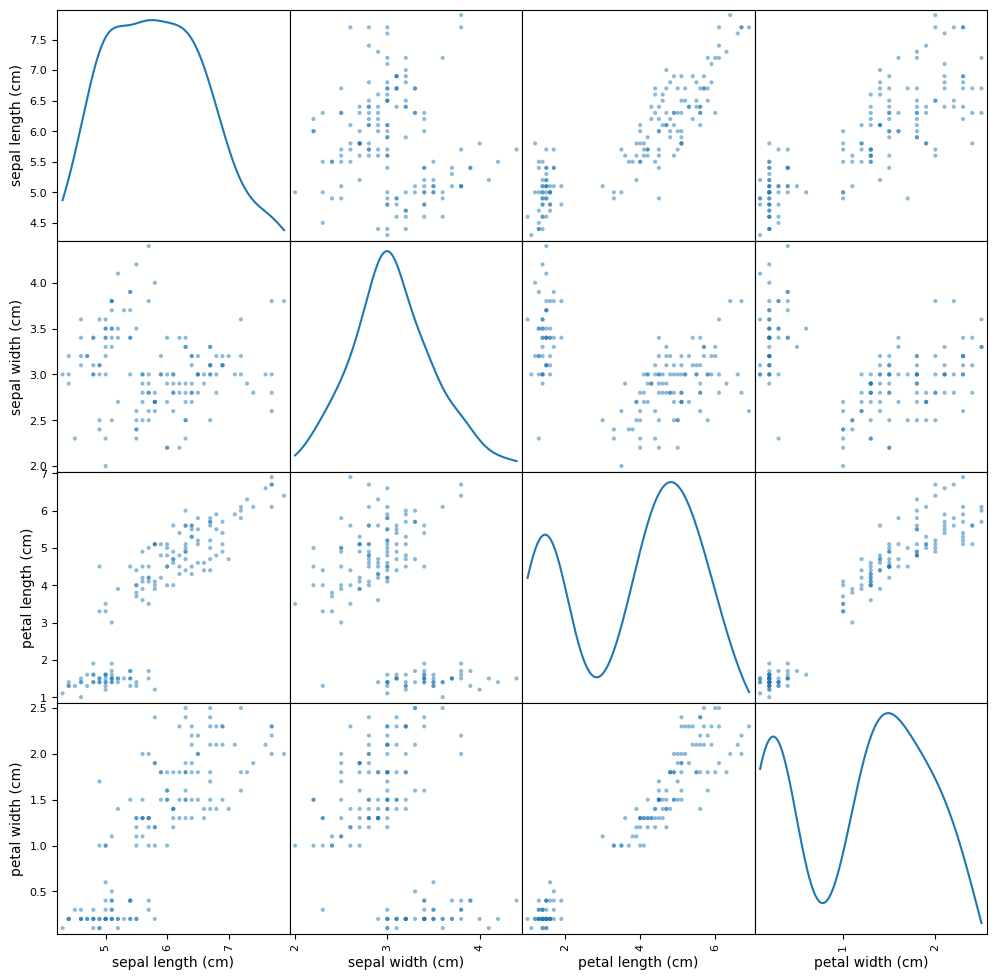

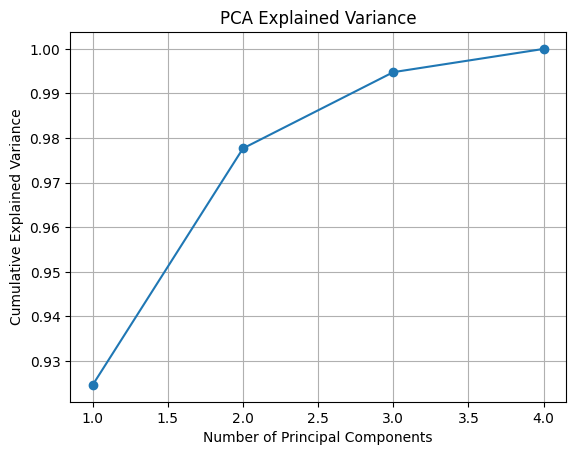

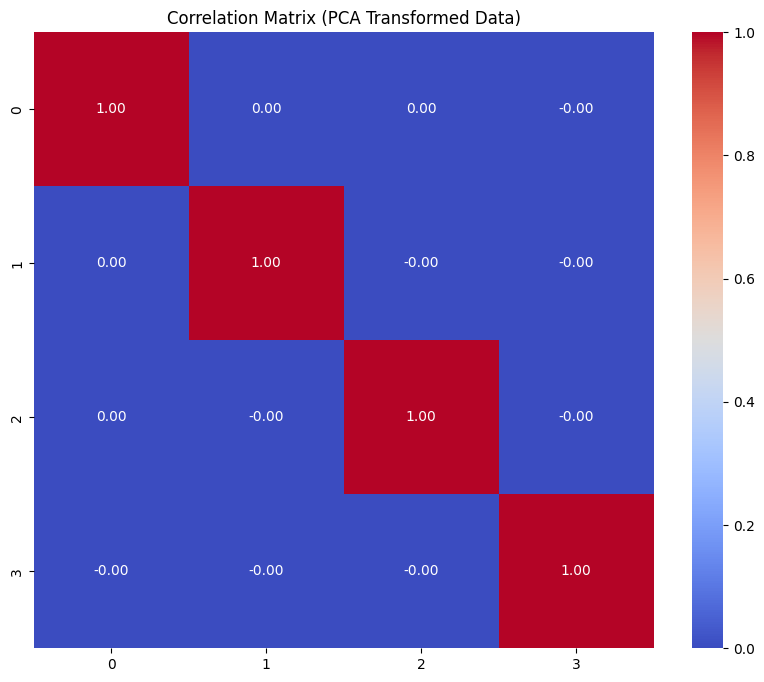


Number of components to retain 90% variance: 1

   Original sepal length (cm)  Original sepal width (cm)  \
0                         5.1                        3.5   
1                         4.9                        3.0   
2                         4.7                        3.2   
3                         4.6                        3.1   
4                         5.0                        3.6   

   Original petal length (cm)  Original petal width (cm)  \
0                         1.4                        0.2   
1                         1.4                        0.2   
2                         1.3                        0.2   
3                         1.5                        0.2   
4                         1.4                        0.2   

   Reconstructed sepal length (cm)  Reconstructed sepal width (cm)  \
0                         4.873326                        3.284202   
1                         4.862479                        3.286739   
2                  

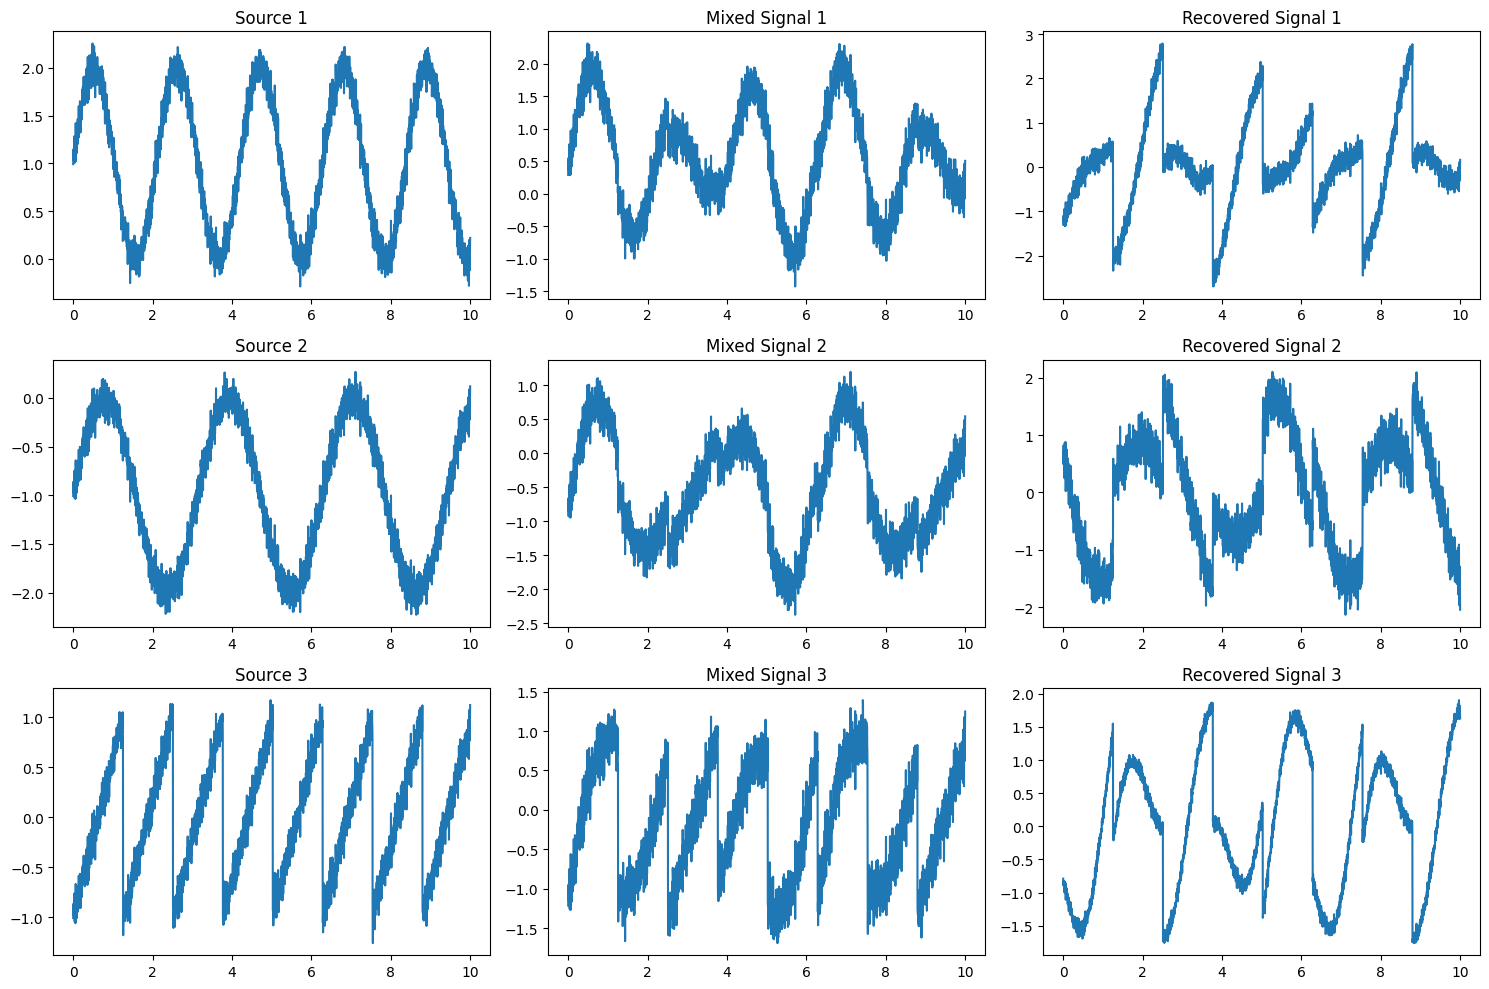

In [37]:
# Main function
if __name__ == "__main__":
    # 1. Import a dataset
    from sklearn.datasets import load_iris
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)

    # 2. Calculate and plot the correlation matrix
    print('')
    plot_correlation_matrix(df, "Correlation Matrix (Original Data)")

    # 3. Plot scatter plots
    print('')
    scatter_plots(df)

    # 4. Run PCA
    pca = PCA()
    pca_data = pca.fit_transform(df)

    # 5. Plot the explained variance curve of the principal components
    print('')
    explained_variance_ratio = pca.explained_variance_ratio_.cumsum()
    plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Cumulative Explained Variance")
    plt.title("PCA Explained Variance")
    plt.grid()
    plt.show()

    # 6. Calculate and plot the correlation matrix in the transformed domain
    print('')
    pca_df = pd.DataFrame(pca_data)
    plot_correlation_matrix(pca_df, "Correlation Matrix (PCA Transformed Data)")

    # 7. Determine the number of principal components needed to retain 90% of the variance
    print('')
    n_components_90 = np.argmax(explained_variance_ratio >= 0.9) + 1
    print(f"Number of components to retain 90% variance: {n_components_90}")

    # 8. Project and compare the original and recovered variables
    print('')
    reduced_pca = PCA(n_components=n_components_90)
    reduced_data = reduced_pca.fit_transform(df)
    reconstructed_data = reduced_pca.inverse_transform(reduced_data)
    comparison_df = pd.DataFrame(np.hstack((df.values, reconstructed_data)),
                                 columns=[f"Original {col}" for col in df.columns] +
                                         [f"Reconstructed {col}" for col in df.columns])
    print(comparison_df.head())

    # 9. Create source signals
    t = np.linspace(0, 10, 3000)
    s1 = np.sin(3 * t) + 1
    s2 = np.sin(2 * t) - 1
    s3 = sawtooth(5 * t)
    noise = np.random.normal(0, 0.1, t.shape)

    s1_noisy = s1 + noise
    s2_noisy = s2 + noise
    s3_noisy = s3 + noise

    sources = np.vstack((s1_noisy, s2_noisy, s3_noisy))

    # 10. Create mixing matrix and mix signals
    mixing_matrix = np.array([[1, 0.5, 0.2],
                               [0.4, 1, 0.3],
                               [0.3, 0.5, 1]])
    mixed_signals = mixing_matrix @ sources

    # 11. Run ICA and compare results
    ica = FastICA(n_components=3)
    recovered_sources = ica.fit_transform(mixed_signals.T).T

    # Plot results
    print('')
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))
    for i, (source, mixed, recovered) in enumerate(zip(sources, mixed_signals, recovered_sources)):
        axes[i, 0].plot(t, source)
        axes[i, 0].set_title(f"Source {i+1}")

        axes[i, 1].plot(t, mixed)
        axes[i, 1].set_title(f"Mixed Signal {i+1}")

        axes[i, 2].plot(t, recovered)
        axes[i, 2].set_title(f"Recovered Signal {i+1}")

    plt.tight_layout()
    plt.show()


### NOTE:

The analysis conducted based on the graphs of the source signals, mixed signals, and signals recovered through the Independent Component Analysis (ICA) technique revealed the following aspects:

The source signals (Source 1, Source 2, and Source 3) exhibit distinct waveforms with the presence of noise. Meanwhile, the mixed signals (Mixed Signal 1, Mixed Signal 2, and Mixed Signal 3) reflect combinations of the original signals, making individual identification of each source challenging due to overlapping characteristics.

After applying ICA, the recovered signals (Recovered Signal 1, Recovered Signal 2, and Recovered Signal 3) showed varying degrees of correspondence with the source signals. The signal "Recovered Signal 2" was reconstructed very closely to "Source 2," indicating a satisfactory recovery. On the other hand, "Recovered Signal 3" exhibited similarities to "Source 3" but still displayed noticeable differences, suggesting a partial recovery. Meanwhile, "Recovered Signal 1" presented artifacts or additional frequencies that do not directly correspond to "Source 1," indicating challenges in fully separating the signal.

It is concluded that the recovery of the original sources was partially satisfactory. ICA proved effective in separating some signals, but in other cases, residual noise or incomplete separations were observed, indicating limitations in the method or the analyzed data. To improve the results, adjustments to the mixing model or ICA parameters would be necessary.

---

## Main Code - Increasing Signal Noise
---

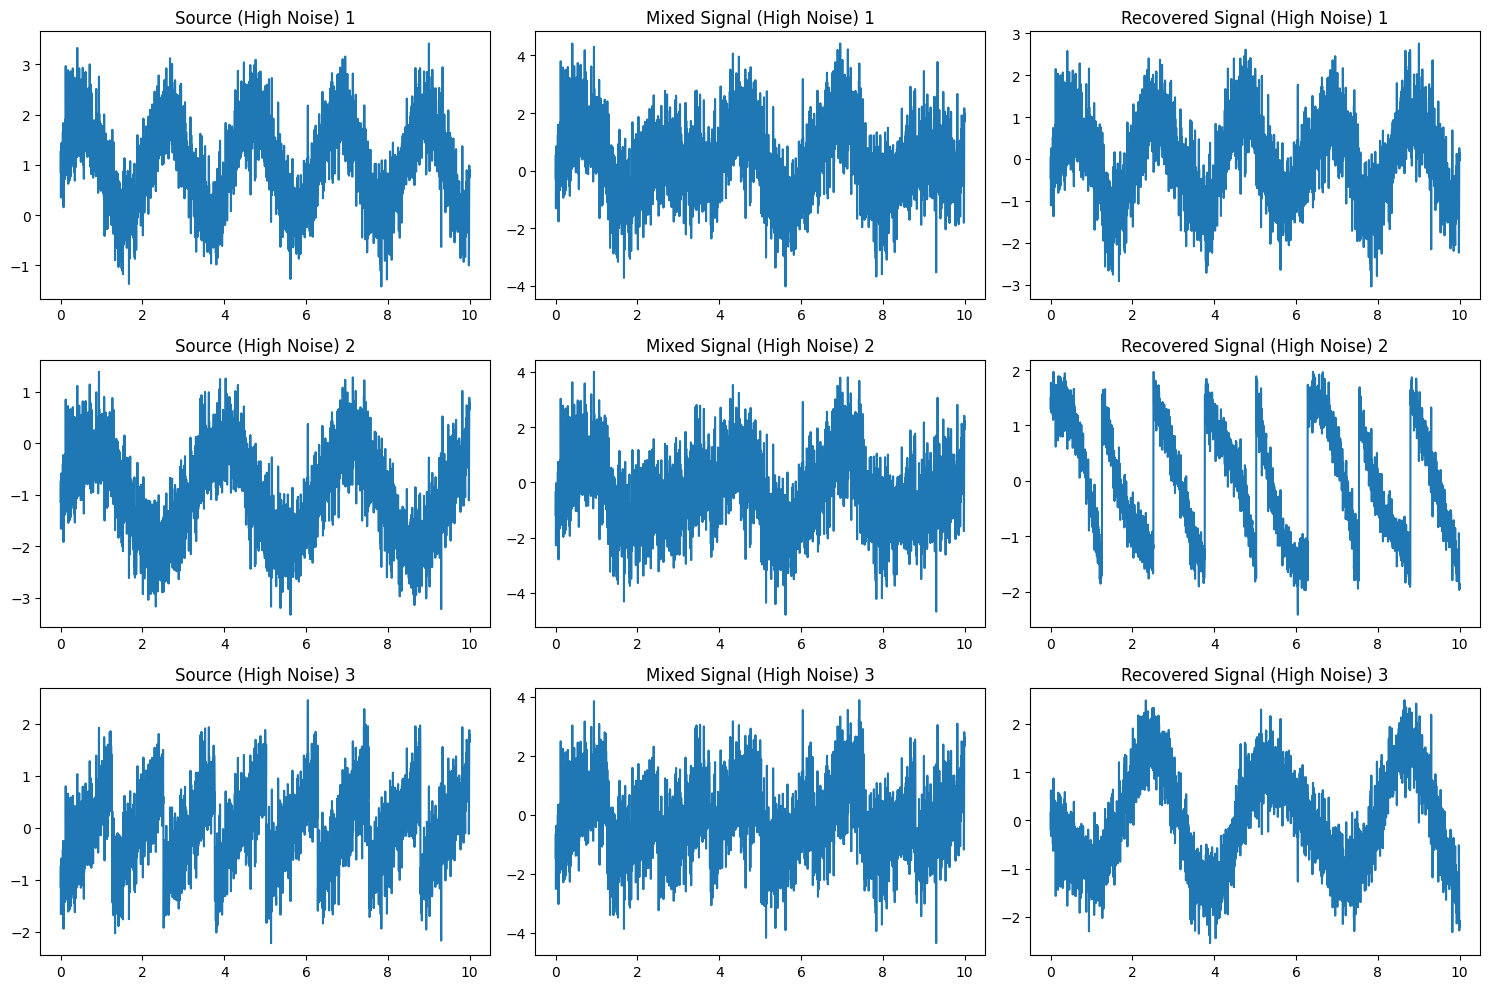

In [38]:
    # 12. Modify mixing matrix and noise
    new_mixing_matrix = np.array([[1, 0.7, 0.3],
                                  [0.6, 1, 0.5],
                                  [0.4, 0.6, 1]])
    noise_high = np.random.normal(0, 0.5, t.shape)

    s1_noisy_high = s1 + noise_high
    s2_noisy_high = s2 + noise_high
    s3_noisy_high = s3 + noise_high

    sources_high = np.vstack((s1_noisy_high, s2_noisy_high, s3_noisy_high))
    mixed_signals_high = new_mixing_matrix @ sources_high

    # ICA with new configuration
    recovered_sources_high = FastICA(n_components=3).fit_transform(mixed_signals_high.T).T


    # Plot results with new configuration
    print('')
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))
    for i, (source, mixed, recovered) in enumerate(zip(sources_high, mixed_signals_high, recovered_sources_high)):
        axes[i, 0].plot(t, source)
        axes[i, 0].set_title(f"Source (High Noise) {i+1}")

        axes[i, 1].plot(t, mixed)
        axes[i, 1].set_title(f"Mixed Signal (High Noise) {i+1}")

        axes[i, 2].plot(t, recovered)
        axes[i, 2].set_title(f"Recovered Signal (High Noise) {i+1}")

    plt.tight_layout()
    plt.show()